# Formation Features

Andrew Weng

8/25/2022

In [41]:
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob, re, pprint, random
from matplotlib import pyplot as plt

from src.formation import FormationCell
from src.utils import get_label_registry
import src.plotter as plotter

import warnings
warnings.filterwarnings('ignore')

In [42]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

## Configure globals

In [4]:
plotter.initialize(plt)

In [5]:
# Formation types
CELL_BASE = 7
CELL_FAST = 33
COLOR_BASE = np.array([0, 0, 0])
COLOR_FAST = np.array([44, 121, 245])/255
COLOR_FAST_RT = np.array([0, 0, 1])
COLOR_FAST_HT = np.array([1, 0, 0])
LINESTYLE_BASE = ':'
LINESTYLE_FAST = '-'

# Pos/neg electrode colors
COLOR_POS = np.array([0, 0, 1])
COLOR_NEG = np.array([1, 0, 0])
COLOR_FULL_CELL = np.array([0, 0, 0])

COLOR_REF = (0.7, 0.7, 0.7)

NOMINAL_CAPACITY_AH = 2.36
CAPACITY_LIMITS_AH = (0.8, 2.4)
TARGET_RETENTION = 0.7

GREY = (0.9, 0.9, 0.9)

## Load resources

In [6]:
cell_dict = dict()
cellid_list = np.arange(1, 41)

for cellid in cellid_list:
    
    if cellid == 9:
        continue
        
    cell_dict[cellid] = FormationCell(cellid)

## Concept Illustration

In [209]:
df_base_form = cell_dict[CELL_BASE].get_formation_data()
df_fast_form = cell_dict[CELL_FAST].get_formation_data()

In [238]:
def plot_formation(df, label, step_indices_to_highlight):
    """ 
    Make a split y-axis plot for the formation data
    """

    gridspec = dict(hspace=0.1, height_ratios=[3, 1])
    fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1, 
                                gridspec_kw=gridspec, 
                                figsize=(18, 5))

    # Top subplot
    ax1.spines['bottom'].set_visible(False)
    ax1.set_xticklabels([])
    ax1.set_xticks([])
    ax1.grid(False)
    ax1.set_ylim(2.7, 4.3)
    ax1.set_xlim((-0.1, 3))
    ax1.set_ylabel('Voltage (V)')
    ax1.yaxis.set_label_coords(-0.08, 0.25)
    ax1.set_yticks([3, 4.2])

    # Bottom subplot
    ax2.spines['top'].set_visible(False)
    ax2.set_ylim(-0.1, 1)
    ax2.set_yticks([0])
    ax2.set_yticklabels([0])
    ax2.set_xticks([0, 1, 2, 3])
    ax2.set_xticklabels(['{:.0f}'.format(x) for x in ax2.get_xticks()])
    ax2.set_xlabel('Days')
    ax2.set_xlim((-0.1, 3))
    ax2.grid(False)

    time_days = (df['Test Time (s)'] - 86400*23/24)/3600/24
    voltage_v = df['Potential (V)']

    ax1.plot(time_days, voltage_v, color='k')
    ax2.plot(time_days, voltage_v, color='k')

    df_highlight= df[df['Step Index'].isin(step_indices_to_highlight)]  
    
    time_days = (df_highlight['Test Time (s)'] - 86400*23/24)/3600/24
    voltage_v = df_highlight['Potential (V)']
    ax1.plot(time_days, voltage_v, color='r')
    ax2.plot(time_days, voltage_v, color='r')

    # Draw the split lines
    d = 0.015
    kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
    ax1.plot((-d,+d), (-d,+d), **kwargs)
    ax1.plot((1-d,1+d),(-d,+d), **kwargs)

    kwargs.update(transform=ax2.transAxes, color='k', clip_on=False) 
    ax2.plot((-d,+d), (1-3*d,1+3*d), **kwargs)
    ax2.plot((1-d,1+d), (1-3*d,1+3*d), **kwargs)

    ax2.legend([label], frameon=False, handlelength=0)

    plt.show()

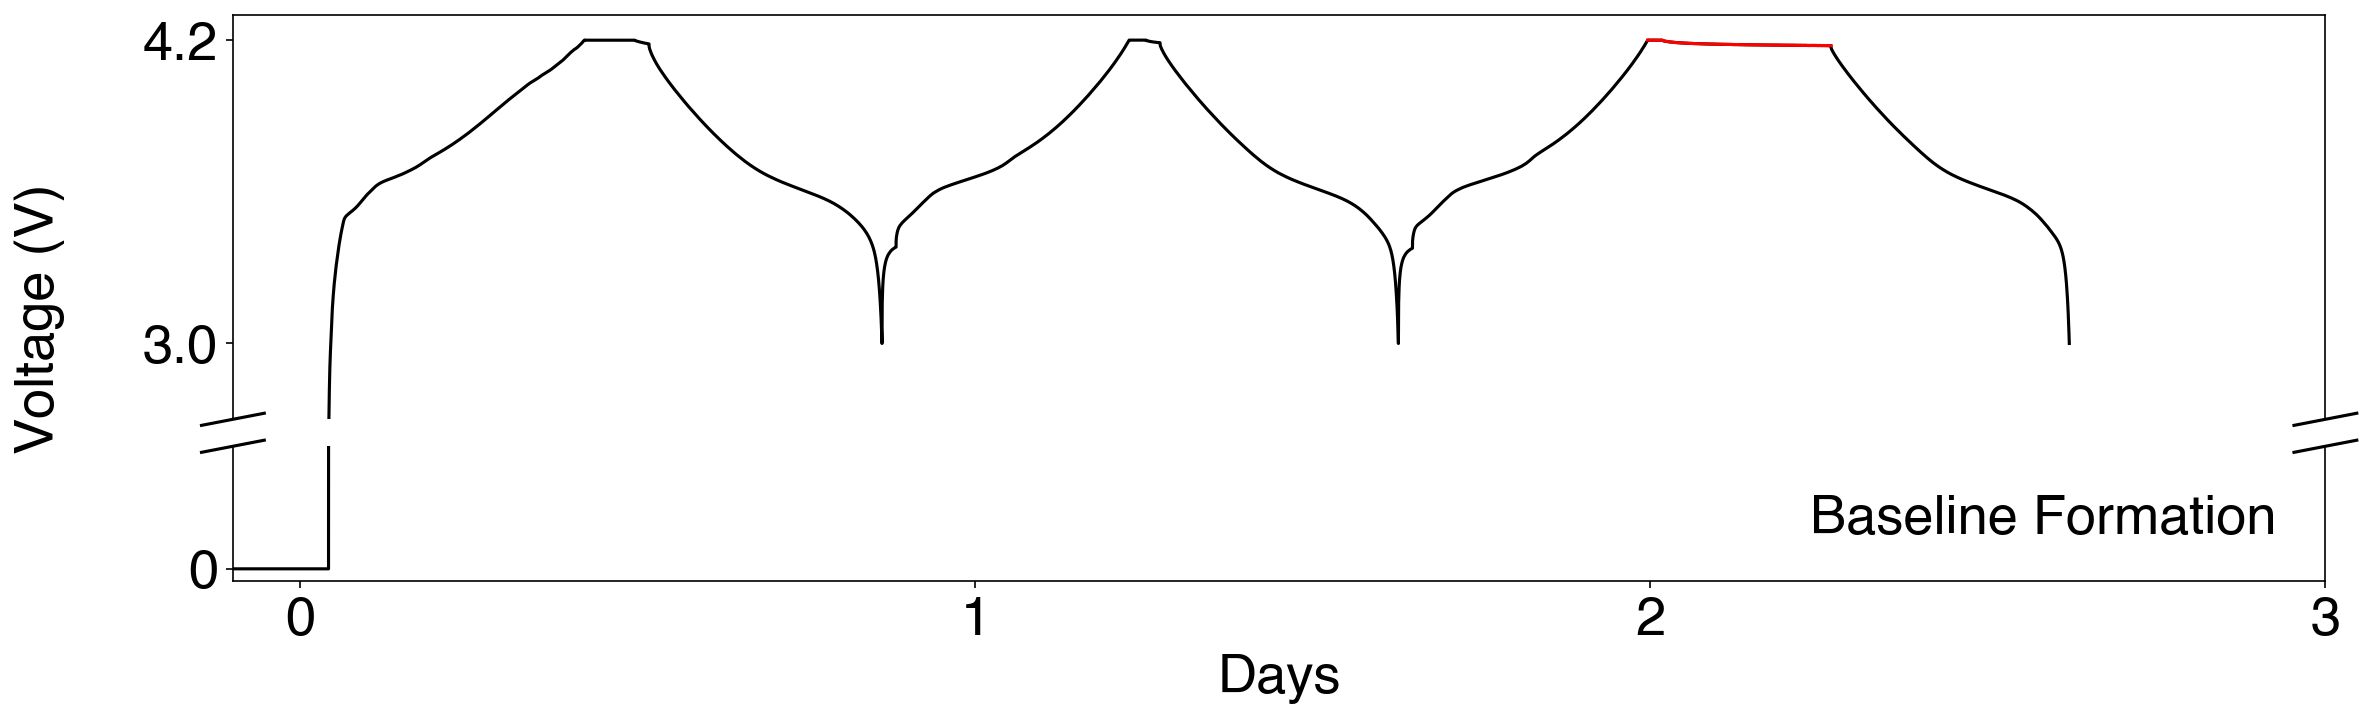

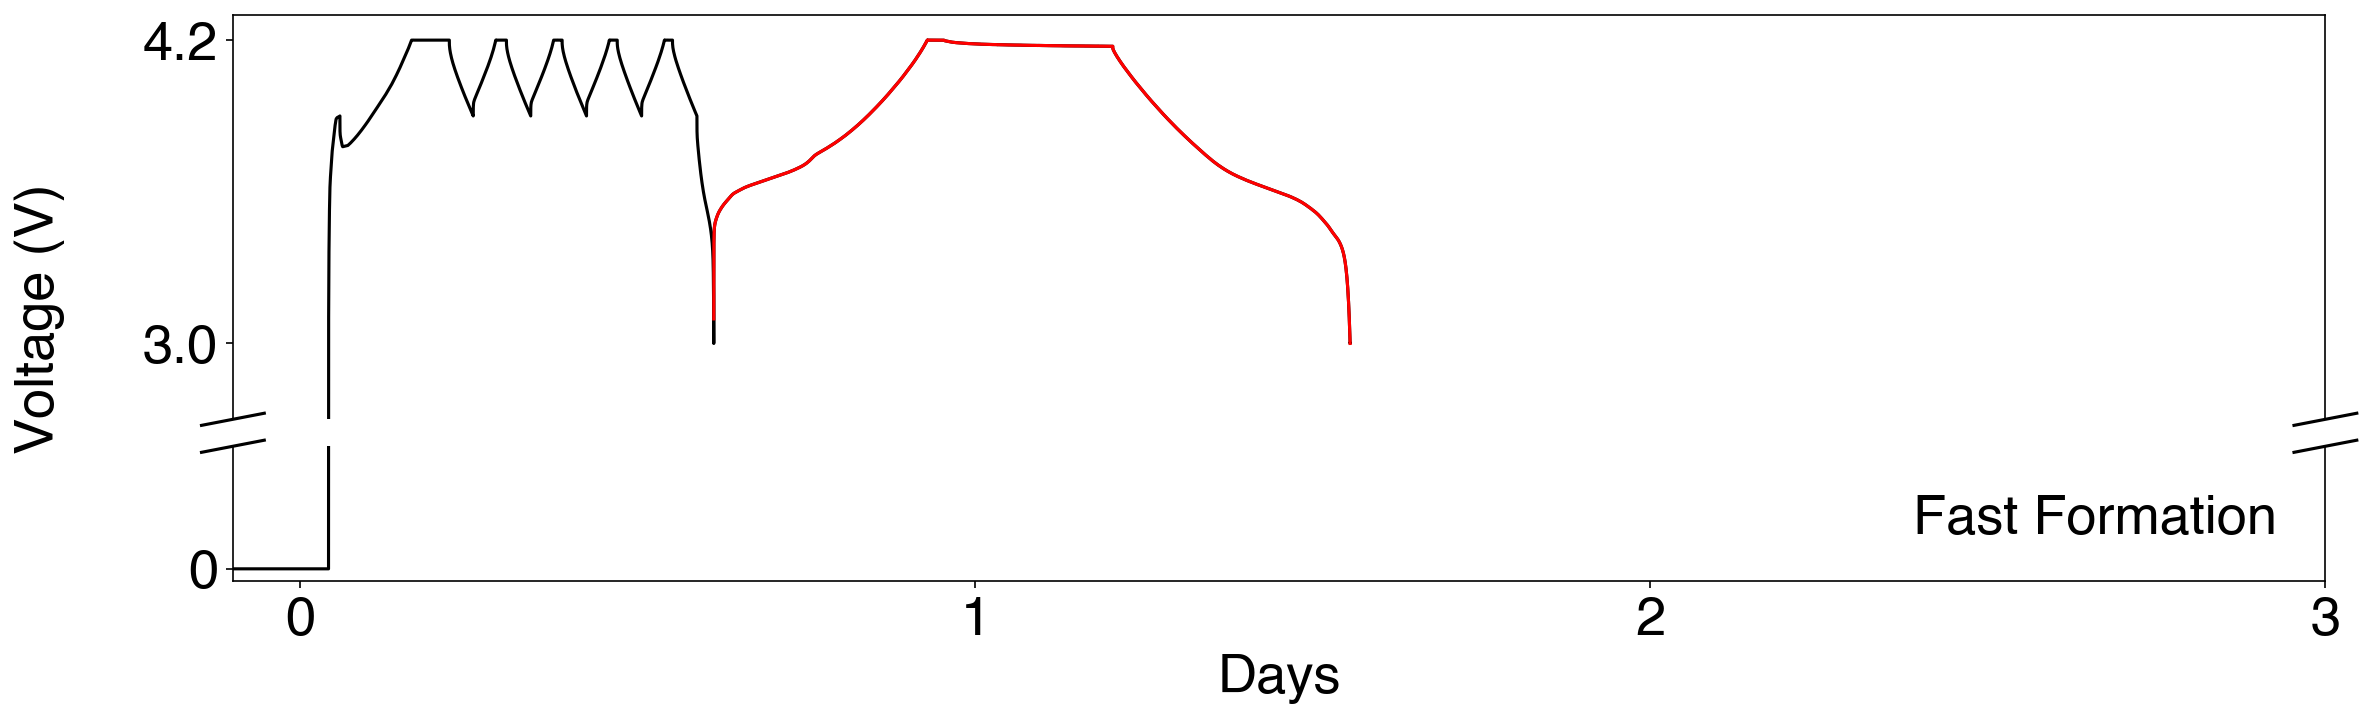

In [239]:
plot_formation(df_base_form, 'Baseline Formation', [11, 12])
plot_formation(df_fast_form, 'Fast Formation', [10, 11, 12, 13, 14, 15])